In [52]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

res = requests.get("https://steemit.com/fun/@king-of-disease/herd-immunity-was-too-strong-the-plague-is-ending#@mathowl/re-king-of-disease-herd-immunity-was-too-strong-the-plague-is-ending-20190402t122916721z")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

In [55]:
f=df[0]

In [56]:
f.columns

Index(['user', 'points', 'total_points', 'direct_points'], dtype='object')

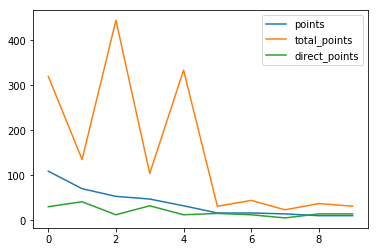

In [111]:
f[0:10].plot()
f_0=f[f['total_points'] != 0]
fdata=f_0[f_0['points'] != 0 ]

In [112]:
fdata['index'] =0

C:\Users\tgdej\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
fdata['index']=fdata['points']*fdata['direct_points']/fdata['total_points']

C:\Users\tgdej\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
fdata_sorted = fdata.sort_values(by='index',ascending=False)
fdata_sorted['sort'] = range(0,len(fdata))

In [137]:
fdata

,user,points,total_points,direct_points,index
0,@reggaemuffin,109,320,30,10.218750
1,@suesa,70,135,41,21.259259
2,@king-of-disease,53,445,12,1.429213
3,@taskmaster4450,47,104,32,14.461538
4,@apsu,32,334,12,1.149701
5,@reggaecupcake,16,31,15,7.741935
6,@lemony-cricket,16,44,12,4.363636
7,@saffisara,14,23,5,3.043478
8,@soyrosa,10,37,14,3.783784
9,@arcange,10,31,14,4.516129


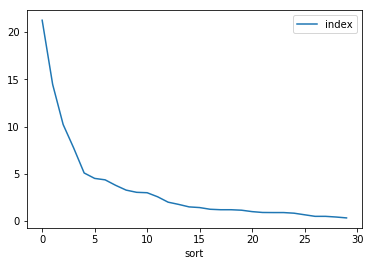

In [116]:
fdata_sorted.plot(kind='line',x='sort',y='index')

In [117]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def func(x, p1,p2,p3):
    return p1*(np.exp(-p2*x))+p3



In [118]:
xdata=np.asarray(fdata_sorted['sort'].values.tolist())
ydata=np.asarray(fdata_sorted['index'].values.tolist())

In [119]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([19.30297128,  0.33844338,  1.15217496])

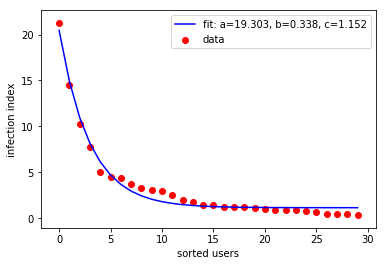

In [150]:
plt.plot(xdata, func(xdata, *popt), 'b-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(xdata, ydata, c='r', label='data')
plt.xlabel('sorted users')
plt.ylabel('infection index')
plt.legend()
plt.savefig('infecindex.png', facecolor = 'w', transparent=False)
plt.show()


In [141]:
from scipy.stats import spearmanr

spearmanr(fdata['index'],fdata['points'])

SpearmanrResult(correlation=0.8351672086356328, pvalue=9.477635732406005e-09)

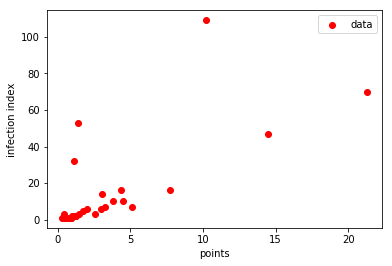

In [151]:
plt.scatter(fdata['index'],fdata['points'],c='r',label='data')
plt.xlabel('points')
plt.ylabel('infection index')
plt.legend()
plt.savefig('infectionversuspoints.png', facecolor = 'w', transparent=False)
plt.show()

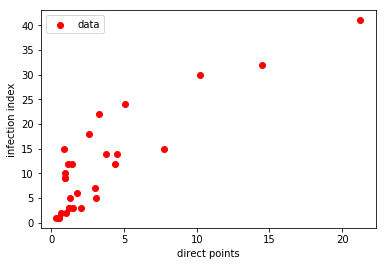

In [153]:
plt.scatter(fdata['index'],fdata['direct_points'],c='r',label='data')
plt.xlabel('direct points')
plt.ylabel('infection index')
plt.legend()
plt.savefig('infectionversusdir_points.png', facecolor = 'w', transparent=False)
plt.show()

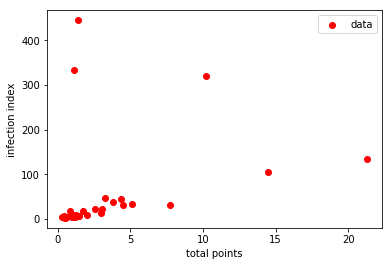

In [154]:
plt.scatter(fdata['index'],fdata['total_points'],c='r',label='data')
plt.xlabel('total points')
plt.ylabel('infection index')
plt.legend()
plt.savefig('infectionversustotal_points.png', facecolor = 'w', transparent=False)
plt.show()

In [138]:
ydata

array([21.25925926, 14.46153846, 10.21875   ,  7.74193548,  5.09090909,
        4.51612903,  4.36363636,  3.78378378,  3.27659574,  3.04347826,
        3.        ,  2.57142857,  2.        ,  1.76470588,  1.5       ,
        1.42921348,  1.25      ,  1.2       ,  1.2       ,  1.1497006 ,
        1.        ,  0.90909091,  0.9       ,  0.9       ,  0.83333333,
        0.66666667,  0.5       ,  0.5       ,  0.42857143,  0.33333333])